In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow as tf

C:\Users\User\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\Anaconda3\envs\tensorflow-gpu\lib\s

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [6]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [7]:
train_dir

'C:\\Users\\User\\.keras\\datasets\\cats_and_dogs_filtered\\train'

In [8]:
validation_dir

'C:\\Users\\User\\.keras\\datasets\\cats_and_dogs_filtered\\validation'

In [9]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [10]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [11]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [12]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [13]:
train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
validation_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [14]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [15]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [16]:
#from IPython.display import display
#from PIL import Image
sample_training_images, _ = next(train_data_gen)

In [17]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

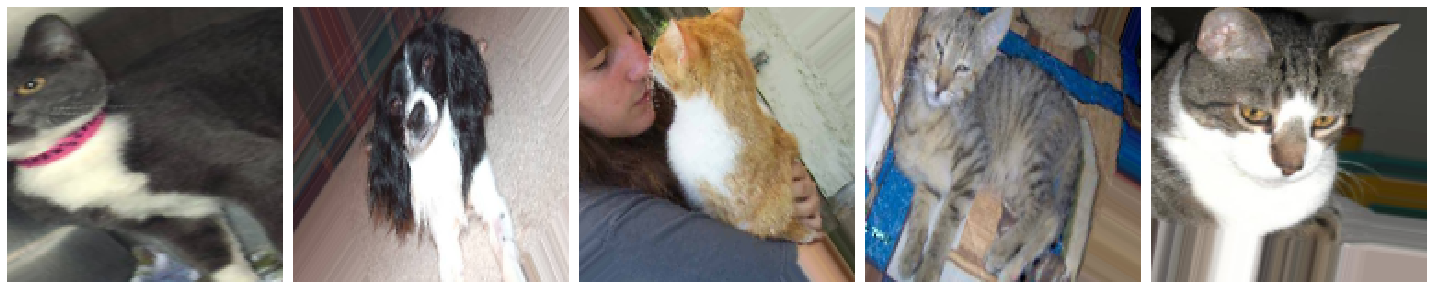

In [18]:
plotImages(sample_training_images[:5])

In [19]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(rate=0.25),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(rate=0.25),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
__________

In [24]:
try:
    model.load_weights("SaveModel/CatDogModel.h5")
    print("load CatDogModel model successful. Continue train model..")
except:
    print("load CatDogModel model failed, start train a new model")

load CatDogModel model failed, start train a new model


In [28]:
history = model.fit_generator(train_data_gen,
                    steps_per_epoch=50, 
                    epochs=8,
                    validation_data=val_data_gen,
                    validation_steps=10)

model.save_weights("SaveModel/CatDogModel_epoch1_to_epoch8.h5")
print("Save CatDogModel model as CatDogModel_epoch1_to_epoch8.h5")          
                              
try:
    model.load_weights("SaveModel/CatDogModel_epoch1_to_epoch8.h5")
    print("load CatDogModel model successful. Continue train model..")
except:
    print("load CatDogModel model failed, start train a new model")
                              
                              
                              
history = model.fit_generator(train_data_gen,
                    steps_per_epoch=50, 
                    epochs=8,
                    validation_data=val_data_gen,
                    validation_steps=10)

model.save_weights("SaveModel/CatDogModel_epoch9_to_epoch16.h5")
print("Save CatDogModel model as CatDogModel_epoch9_to_epoch16.h5") 

Epoch 1/8
50/50 [==============================] - 88s 2s/step - loss: 0.6240 - acc: 0.6385 - val_loss: 0.6406 - val_acc: 0.6258
Epoch 2/8
50/50 [==============================] - 81s 2s/step - loss: 0.6049 - acc: 0.6507 - val_loss: 0.6475 - val_acc: 0.6346
Epoch 3/8
50/50 [==============================] - 83s 2s/step - loss: 0.5919 - acc: 0.6748 - val_loss: 0.6679 - val_acc: 0.6250
Epoch 4/8
50/50 [==============================] - 87s 2s/step - loss: 0.5788 - acc: 0.6765 - val_loss: 0.6598 - val_acc: 0.6449
Epoch 5/8
50/50 [==============================] - 86s 2s/step - loss: 0.5700 - acc: 0.6921 - val_loss: 0.6736 - val_acc: 0.6369
Epoch 6/8
50/50 [==============================] - 86s 2s/step - loss: 0.5768 - acc: 0.6919 - val_loss: 0.6783 - val_acc: 0.6401
Epoch 7/8
50/50 [==============================] - 87s 2s/step - loss: 0.5571 - acc: 0.7057 - val_loss: 0.6619 - val_acc: 0.6250
Epoch 8/8
50/50 [==============================] - 87s 2s/step - loss: 0.5598 - acc: 0.7055 - val

In [29]:
import numpy as np
import matplotlib.pyplot as plt
def show_model_result(model_history,train,val):
    plt.plot(model_history.history[train])
    plt.plot(model_history.history[val])
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend([train,val],loc='upper left')
    plt.show()

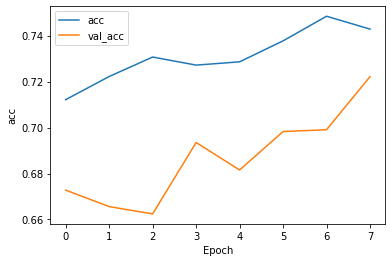

In [30]:
show_model_result(history,'acc','val_acc')

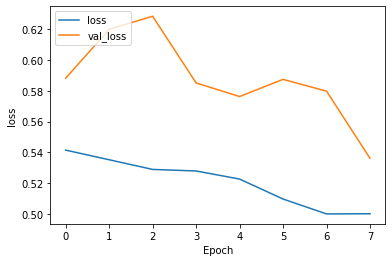

In [31]:
show_model_result(history,'loss','val_loss')

In [32]:
predict_probability=model.predict(val_data_gen)

In [33]:
predict_probability[:10]

array([[0.45413148],
       [0.86775345],
       [0.922854  ],
       [0.58220804],
       [0.64145356],
       [0.24006778],
       [0.17665671],
       [0.5803855 ],
       [0.26842245],
       [0.17364772]], dtype=float32)

In [34]:
predict_class=model.predict_classes(val_data_gen)

In [35]:
CLASS_NAMES = np.array([item.name for item in train_dir.glob('*')])
CLASS_NAMES

AttributeError: 'str' object has no attribute 'glob'

In [43]:
label_dictionary={0:"cats",1:"dogs"}

image_batch_val, label_batch_val = next(val_data_gen)

def show_batch_predict(image_batch, label_batch):
  predict_batch_class=model.predict_classes(image_batch)
  plt.figure(figsize=(10,10))
  for n in range(25):
      #print(predict[n])
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      if(predict_batch_class[n]==0):       
            plt.title('predict: cat')
      if(predict_batch_class[n]==1):
            plt.title('predict: dog')
      #plt.title('predict: ' + predict_class[n])
      plt.axis('off')

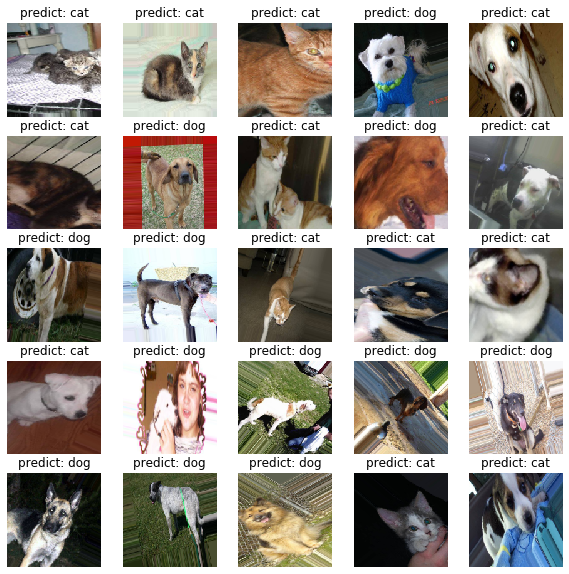

In [44]:
show_batch_predict(image_batch_val, label_batch_val)

In [45]:
image_batch_val, label_batch_val = next(val_data_gen)

In [47]:
import matplotlib.pyplot as plt

image_batch_val, label_batch_val = next(val_data_gen)
predict_batch_probability=model.predict(image_batch_val)
predict_batch_class=model.predict_classes(image_batch_val)

def show_predict_probability(j):
    plt.figure(figsize=(1,1))
    plt.imshow(image_batch_val[j])
    if(predict_class[j]==0):
        print(label_dictionary[0])
    else:
        print(label_dictionary[1])
    print("predict label: "+ str(predict_class[j]))
    plt.show()
    
    for i in range(0,1):
        print(label_dictionary[i] + ' probability: %1.9f'%(predict_batch_probability[j][i]))
    print()

cats
predict label: [0]


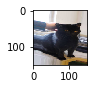

cats probability: 0.387376040

cats
predict label: [0]


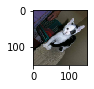

cats probability: 0.684054732

dogs
predict label: [1]


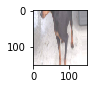

cats probability: 0.507297993

cats
predict label: [0]


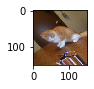

cats probability: 0.436023802

dogs
predict label: [1]


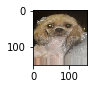

cats probability: 0.253706425

cats
predict label: [0]


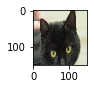

cats probability: 0.059343196

cats
predict label: [0]


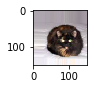

cats probability: 0.566929638

dogs
predict label: [1]


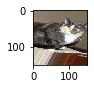

cats probability: 0.120395176

cats
predict label: [0]


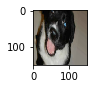

cats probability: 0.437319487

cats
predict label: [0]


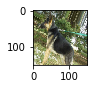

cats probability: 0.991611719

cats
predict label: [0]


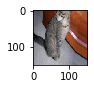

cats probability: 0.225986421

dogs
predict label: [1]


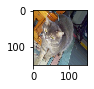

cats probability: 0.171558559

dogs
predict label: [1]


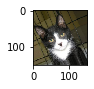

cats probability: 0.281021923

cats
predict label: [0]


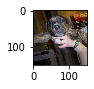

cats probability: 0.413983524

cats
predict label: [0]


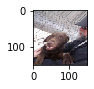

cats probability: 0.172070712

dogs
predict label: [1]


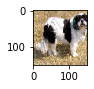

cats probability: 0.836064935

dogs
predict label: [1]


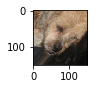

cats probability: 0.556471169

cats
predict label: [0]


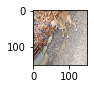

cats probability: 0.393128246

cats
predict label: [0]


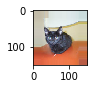

cats probability: 0.439933538

dogs
predict label: [1]


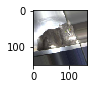

cats probability: 0.037470732



In [48]:
for i in range(0,20):
    show_predict_probability(i)